# 설치

In [14]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# 기본설정

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
import re
import seaborn as sns

In [2]:
# 한글 폰트 설정
all_fonts = fm.findSystemFonts(fontpaths=None, fontext="ttf")

# "Nanum"으로 시작하는 폰트 찾기
nanum_fonts = [font for font in all_fonts if "Nanum" in font]

# 폰트 설정
if len(nanum_fonts) > 0:
    font_name = fm.FontProperties(fname=nanum_fonts[1]).get_name()
    plt.rcParams["font.family"] = font_name
else:
    print("Nanum으로 시작하는 폰트가 설치되지 않았습니다.")

In [3]:
font_properties = plt.rcParams["font.family"]
print("현재 설정된 폰트:", font_properties)

현재 설정된 폰트: ['NanumMyeongjo']


In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 데이터 로드 및 전처리

In [5]:
df_all = pd.read_csv('all_reviews_utf8.csv')

In [6]:
# 'comment' 열에서 공란, '.' 등 특수문자만 포함된 데이터 제거
# 공란이 아니면서 특수문자만 포함되지 않은 데이터만 필터링
df_new_filtered = df_all[~df_all['comment'].str.match(r'^\s*$|^[^\w가-힣]*$', na=False)]

# 필터링된 데이터 확인
df_new_filtered.head()

df_filtered = df_new_filtered.dropna(subset=['comment'])

In [7]:
print(len(df_all),len(df_new_filtered), len(df_filtered))

161997 161872 161448


In [8]:
df_new_filtered.to_csv('all_reviews_filtered_utf8.csv', encoding='utf8', index = False)

# isbn기준 리뷰가 많은 책 상위 20개

보고 싶은 순위를 입력하세요 (예를들어 10을 입력하면 1~10위 책이 출력됩니다):  10


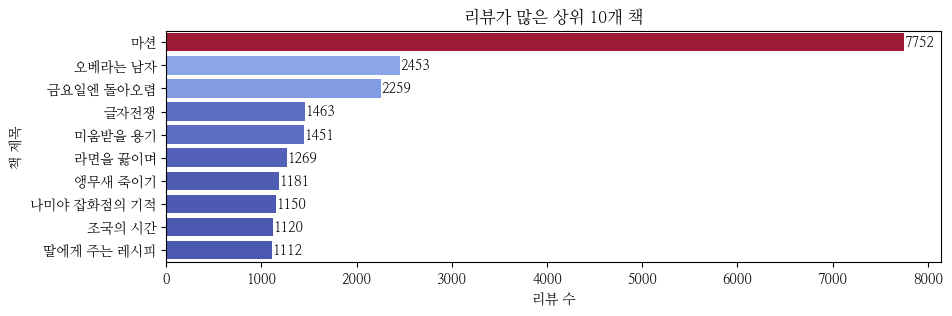

In [19]:
# 사용자로부터 보고 싶은 순위 입력받기
while True:    
    try: 
        rank_input = int(input('보고 싶은 순위를 입력하세요 (예를들어 10을 입력하면 1~10위 책이 출력됩니다): '))
        # 'isbn' 별로 리뷰가 많은 책 상위 {{rank_input}}개를 찾음
        top_isbn = df_filtered['isbn'].value_counts().head(rank_input)
        
        # 상위 {rank_input}개 isbn에 해당하는 책 제목과 리뷰 갯수를 가져옴
        top_books = df_filtered[df_filtered['isbn'].isin(top_isbn.index)].groupby('isbn')['title'].first().reset_index()
        top_books['review_count'] = top_books['isbn'].map(top_isbn)
        
        # 시각화
        import matplotlib.pyplot as plt
        import seaborn as sns
        # 리뷰 갯수가 많은 순으로 데이터 정렬
        top_books_sorted = top_books.sort_values(by='review_count', ascending=False)
        
        plt.figure(figsize=(10, rank_input*0.3))
        ax = sns.barplot(x='review_count', y='title', data=top_books_sorted, palette='coolwarm', hue='review_count', legend=False)
        
        # 리뷰 갯수 데이터 레이블 표시
        for p in ax.patches:
            ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center', color='black', fontsize=10)
        plt.title(f'리뷰가 많은 상위 {rank_input}개 책')
        plt.xlabel('리뷰 수')
        plt.ylabel('책 제목')
        plt.show()
        break
    except:
        print("숫자를 입력해주세요")
        continue

# 총 리뷰에서 많이 사용되는 단어 원하는 조건으로 검색
원하는 최소 글자수와 순위를 설정할 수 있어요! 순위는 상위 n개, 원하는 범위의 순위를 확인할 수 있어요!

In [9]:
# 리뷰 텍스트를 단어로 분할하는 함수
def extract_english_words(text):
    # 정규 표현식을 사용하여 5글자 이상인 영어 단어만 추출
    return re.findall(r'\b[a-zA-Z]{5,}\b', text.lower())

# 리뷰 데이터에서 모든 영어 단어 추출
english_words = []
for review in df_filtered['comment']:
    english_words.extend(extract_english_words(review))

# 영어 단어 중에서 100번 이상 나온 단어 추출
common_english_words = [word for word, count in Counter(english_words).items() if count >= 10]

In [10]:
#불용어 추가
stopwords = set(['은', '는', '이', '가', '을', '를', '이다', '있는', '그', '것', '등', '이랑', '이라고', '에게', '해서', '하고', '입니다', '합니다', '그리고', '그런데', '그래서', '때문에', '이런', '저런', '어떤', '같은', '있다', '없다', '하는', '이런', '저런', '어떤', '같은', '그런','the', 'and', 'in', 'to', 'of', 'a', 'is', 'that', 'it', 'on', 'you', 'for', 'with', 'are', 'be', 'this', 'as', 'or', 'at', 'your', 'from', 'an', 'about', 'what', 'so', 'if', 'there', 'when', 'which', 'but', 'my', 'his', 'her', 'our', 'their', 'they', 'them', 'him', 'he', 'she', 'it', 'style']+common_english_words)

In [12]:
rank_total

21

분석하고 싶은 최소 글자수를 입력하세요:  4
보고 싶은 순위를 입력하세요 (상위 n위를 보고싶으면 "n" 형식으로 입력, n위 ~ m위의 결과를 보고싶으면 "n~m" 형식으로 입력해주세요):  124~135


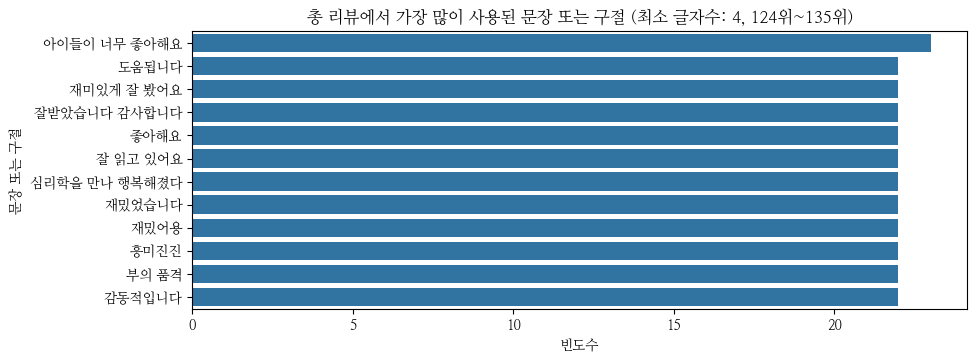

결과에서 전체 리뷰와 책 제목을 확인하고 싶은 특정 문장을 입력하세요:  재밌어용


검색결과: 42
책 제목: 데미안
리뷰 내용: 꼭 읽어보고싶으수 구매했는데 재밌어용

책 제목: 지적 대화를 위한 넓고 얕은 지식: 제로 편
리뷰 내용: 재밌어용

책 제목: EEA: English for Everyday Activities(한글판)
리뷰 내용: 그림도 나와있고 영어 강의도 들을 수 있어 ㅋ재밌어용

책 제목: 미드나잇 선 1
리뷰 내용: 재밌어용 베스트셀러 답네요!!

책 제목: 미드나잇 선 1
리뷰 내용: 너무재밌어용

책 제목: 심리학을 만나 행복해졌다(특별판 리커버에디션)
리뷰 내용: 재밌어용 심리학에 관심이 생기네용

책 제목: 원피스 101: 주연 등장
리뷰 내용: 재밌어용짱입니다헤헤

책 제목: 원피스 101: 주연 등장
리뷰 내용: 원피스 벌써 101권이네요 재밌어용b

책 제목: 저주토끼
리뷰 내용: 쓱 잘 읽혀요 재밌어용

책 제목: 모든 순간이 너였다
리뷰 내용: 재밌어용ㅇ

책 제목: 박막례, 이대로 죽을 순 없다
리뷰 내용: 재밌어용 ^^ 베스트셀러라 읽었는데 좋아요!

책 제목: 세계사를 바꾼 10가지 약
리뷰 내용: 재밌어용 조아요 ㅎㅎ

책 제목: 위저드 베이커리
리뷰 내용: 한 번 읽어볼까 하다가 읽었는데 역시 재밌어용

책 제목: 원피스 100
리뷰 내용: 재밌어용

책 제목: 원피스 102
리뷰 내용: 재밌어용

책 제목: 원피스 93
리뷰 내용: 재밌어용

책 제목: 원피스 95
리뷰 내용: 재밌어용

책 제목: 원피스 96
리뷰 내용: 재밌어용

책 제목: 나미야 잡화점의 기적 (양장)
리뷰 내용: 재밌어용

책 제목: 마션
리뷰 내용: 재밌어용

책 제목: 마션
리뷰 내용: 너무 재밌어용 영화로도 봤지만 역시 책이 짱이네요

책 제목: 마션
리뷰 내용: 재밌어용

책 제목: 마션
리뷰 내용: 영화보다 배 더 재밌어용

책 제목: 마션
리뷰 내용: 영화도 아주 재밌고 소설도 아주 재밌는 거한번쯤 읽어보면 재밌어용

책 제목: 오베라는 남자
리뷰 내용: 책 표지가 잘나타내준 무뚝뚝한 할아버지인 오베의 일상이야

In [18]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

while True:    
    try: 
        # 사용자로부터 최소 글자수 입력받기
        min_length = int(input("분석하고 싶은 최소 글자수를 입력하세요: "))
        
        # 사용자로부터 보고 싶은 순위 입력받기
        rank_input = input('보고 싶은 순위를 입력하세요 (상위 n위를 보고싶으면 "n" 형식으로 입력, n위 ~ m위의 결과를 보고싶으면 "n~m" 형식으로 입력해주세요): ')
        
        # 입력된 숫자가 1개인지 확인하고, 1개일 경우 해당 숫자를 상위 n위로 설정
        if len(rank_input.split('~')) == 1:
            start_rank = 1
            end_rank = int(rank_input)
        else:
            start_rank, end_rank = map(int, rank_input.split('~'))
        
        # 리뷰 텍스트를 문장 또는 구절로 분할하는 함수
        def split_text(text):
            # 띄어쓰기를 포함하여 한글 문장 또는 구절 찾기
            phrases = re.findall(r'[가-힣\s]{'+str(min_length)+',}', text.lower())
            # 사용자가 지정한 글자수 이상인 문장 또는 구절만 필터링
            return [phrase.strip() for phrase in phrases if len(phrase.strip()) >= min_length]
        
        # 리뷰 데이터에서 모든 문장 또는 구절 추출
        all_phrases = []
        for review in df_filtered['comment']:
            all_phrases.extend(split_text(review))
        
        # 가장 흔한 문장 또는 구절 찾기 (stopwords 제외)
        most_common_phrases = Counter(all_phrases).most_common(end_rank)
        most_common_phrases_filtered = [(phrase, count) for phrase, count in most_common_phrases if phrase not in stopwords]
        
        # 보고 싶은 순위에 해당하는 데이터 선택
        phrases, counts = zip(*most_common_phrases_filtered[start_rank-1:end_rank])

        #총 갯수
        rank_total = abs(end_rank - start_rank + 1 )
        
        # 시각화
        plt.figure(figsize=(10, 0.3*rank_total))
        sns.barplot(x=list(counts), y=list(phrases))
        plt.title(f'총 리뷰에서 가장 많이 사용된 문장 또는 구절 (최소 글자수: {min_length}, {start_rank}위~{end_rank}위)')
        plt.xlabel('빈도수')
        plt.ylabel('문장 또는 구절')
        plt.show()
        
        
        # 추가된 부분: 선택한 특정 문장에 해당하는 리뷰의 전체 내용과 제목 출력
        selected_phrase = input("결과에서 전체 리뷰와 책 제목을 확인하고 싶은 특정 문장을 입력하세요: ")
        selected_reviews = df_filtered[df_filtered['comment'].str.contains(selected_phrase)]
        
        if not selected_reviews.empty:
            print(f"검색결과: {len(selected_reviews)}")
            for idx, review in selected_reviews.iterrows():
                print(f"책 제목: {review['title']}")
                print(f"리뷰 내용: {review['comment']}\n")
        else:
            print("해당하는 리뷰를 찾지 못했습니다.")
        break
    except:
        print("형식에 맞게 입력해주세요")